<a href="https://colab.research.google.com/github/manishbhnau/Repo/blob/master/feature_selection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt 
plt.rc("font", size=14)

import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Credit.csv to Credit.csv


In [ ]:
data=pd.read_csv("Credit.csv", header=0)
data=data.dropna()

print(data.columns)
print(data.count)

data['Gender'] = data['Gender'].replace(['Male'],1)
data['Gender'] = data['Gender'].replace(['Female'],0)

data['Student'] = data['Student'].replace(['Yes'],1)
data['Student'] = data['Student'].replace(['No'],0)

data['Married'] = data['Married'].replace(['Yes'],1)
data['Married'] = data['Married'].replace(['No'],0)


data['Ethnicity']= data['Ethnicity'].replace(['Caucasian'],0)
data['Ethnicity']= data['Ethnicity'].replace(['Asian'],1)
data['Ethnicity']= data['Ethnicity'].replace(['African American'],2)

print (data.head())
data.to_csv("credit_edit.csv", index=False)
files.download("credit_edit.csv")
#data['Income'].plot()
#data.plot(figsize=(20, 15))

Index(['Unnamed: 0', 'Income', 'Limit', 'Rating', 'Cards', 'Age', 'Education',
       'Gender', 'Student', 'Married', 'Ethnicity', 'Balance', 'Defaultee'],
      dtype='object')
<bound method DataFrame.count of      Unnamed: 0   Income  Limit  ...         Ethnicity  Balance  Defaultee
0             1   14.891   3606  ...         Caucasian      333          0
1             2  106.025   6645  ...             Asian      903          0
2             3  104.593   7075  ...             Asian      580          0
3             4  148.924   9504  ...             Asian      964          0
4             5   55.882   4897  ...         Caucasian      331          0
..          ...      ...    ...  ...               ...      ...        ...
395         396   12.096   4100  ...         Caucasian      560          0
396         397   13.364   3838  ...  African American      480          0
397         398   57.872   4171  ...         Caucasian      138          0
398         399   37.728   2525  ...   

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
X = data.loc[:, data.columns != 'Defaultee']
y = data.loc[:, data.columns == 'Defaultee']
X

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
columns = X_train.columns
columns

Index(['Unnamed: 0', 'Income', 'Limit', 'Rating', 'Cards', 'Age', 'Education',
       'Gender', 'Student', 'Married', 'Ethnicity', 'Balance'],
      dtype='object')

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
logreg = LogisticRegression()

# Build step forward feature selection
sfs1 = sfs(logreg, k_features=5, forward=True, floating=False, verbose=2, scoring='accuracy', cv=5)
sfs1=sfs1.fit(X_train, y_train)

#Build step backward feature selection
sfs1 = sfs(logreg, k_features=11, forward=False, floating=False, cv=0)
sfs1=sfs1.fit(X_train.values, y_train.values)

#Build both forward and backward feature selection
sfs1 = sfs(logreg, k_features=(5,7), forward=True, floating=False, cv=0)
sfs1=sfs1.fit(X_train.values, y_train.values)

feat_cols = list(sfs1.k_feature_idx_)

print(sfs1.k_feature_names_)
print(feat_cols)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d ar

('0', '1', '2', '5', '11')
[0, 1, 2, 5, 11]


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iteratio

In [ ]:
#logreg = RandomForestClassifier(n_estimators=1000, random_state=42, max_depth=4)
#clf.fit(X_train[:, feat_cols], y_train)

from sklearn.metrics import accuracy_score

logreg= LogisticRegression()
print (X_train.iloc[:, feat_cols])
logreg.fit(X_train.iloc[:, feat_cols], y_train)
y_train_pred = logreg.predict(X_train.iloc[:, feat_cols])
print('Training accuracy on selected features: %.3f' % accuracy_score(y_train, y_train_pred))

y_test_pred = logreg.predict(X_test.iloc[:, feat_cols])
print('Testing accuracy on selected features: %.3f' % accuracy_score(y_test, y_test_pred))

     Unnamed: 0   Income  Limit  Age  Balance
92           93   30.733   2832   51        0
223         224   27.512   4613   72      573
234         235   69.656   8244   41     1329
232         233   15.741   4788   39      689
377         378   28.144   1567   51        0
..          ...      ...    ...  ...      ...
323         324  182.728  13913   98     1999
192         193   28.508   3933   56      336
117         118   91.362   9113   47     1341
47           48   44.646   4431   49      797
172         173   76.348   4697   60      108

[280 rows x 5 columns]
Training accuracy on selected features: 1.000
Testing accuracy on selected features: 0.983


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


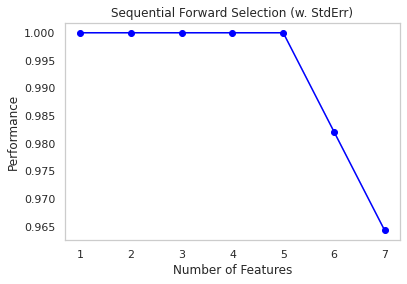

In [ ]:
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
import matplotlib.pyplot as plt
fig1 = plot_sfs(sfs1.get_metric_dict(), kind='std_dev')
plt.title('Sequential Forward Selection (w. StdErr)')
plt.grid()
plt.show()